# HEX algorithm **Kopuru Vespa Velutina Competition**

**Linear Regression model**

Purpose: Predict the number of Nests in each of Biscay's 112 municipalities for the year 2020.

Output: *(WaspBusters_20210512_batch_OLSyears.csv)*

@authors:
* mario.bejar@student.ie.edu
* pedro.geirinhas@student.ie.edu
* a.berrizbeitia@student.ie.edu
* pcasaverde@student.ie.edu

## Libraries

In [1]:
# Base packages -----------------------------------
import numpy as np
import pandas as pd

# Visualization -----------------------------------
from matplotlib import pyplot

# Scaling data ------------------------------------
from sklearn import preprocessing

# Linear Regression -------------------------------
from statsmodels.formula.api import ols
#from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression


## Functions

In [2]:
# Function that checks if final Output is ready for submission or needs revision   

def check_data(HEX):

    if HEX.shape == (112, 3):
        print(HEX.shape,": Shape is correct.")
    else:
        print(HEX.shape,": Shape is **INCORRECT!**")

    if HEX["CODIGO MUNICIPIO"].nunique() == 112:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is correct.")
    else:
        print(HEX["CODIGO MUNICIPIO"].nunique(),": Number of unique municipalities is **INCORRECT!**")
        
    if any(HEX["NIDOS 2020"] < 0):
        print("**INCORRECT!** At least one municipality has NESTS <= 0.")
    else:
        print("Great! All municipalities have NESTS >= 0.")
    
    print("The Total 2020 Nests' Prediction is", int(HEX["NIDOS 2020"].sum()))

## Get the data

In [3]:
QUEEN_train = pd.read_csv('./WBds03_QUEENtrainYEARS.csv', sep=',')
QUEEN_predict = pd.read_csv('./WBds03_QUEENpredictYEARS.csv', sep=',')

clusters = pd.read_csv("../../../Other_open_data/cluster.csv")

In [4]:
#QUEEN_predict.isnull().sum()

In [5]:
QUEEN_train.shape

(224, 32)

In [6]:
QUEEN_predict.shape

(112, 32)

## Caracterize in clusters

In [7]:
QUEEN_train = pd.merge(QUEEN_train, clusters, how = 'left', left_on = 'municip_code', right_on = 'CODIGO MUNICIPIO')
QUEEN_predict = pd.merge(QUEEN_predict, clusters, how = 'left', left_on = 'municip_code', right_on = 'CODIGO MUNICIPIO')

In [8]:
QUEEN_train.drop(columns = ['CODIGO MUNICIPIO'], inplace=True)
QUEEN_predict.drop(columns = ['CODIGO MUNICIPIO'], inplace=True)

In [9]:
QUEEN_train.fillna(4, inplace=True)
QUEEN_predict.fillna(4, inplace=True)

In [10]:
QUEEN_train.shape

(224, 33)

In [11]:
QUEEN_predict.shape

(112, 33)

In [12]:
#QUEEN_train.isnull().sum()

In [13]:
#QUEEN_predict.isnull().sum()

In [14]:
QUEEN_train.Cluster.value_counts()

0.0    142
1.0     28
2.0     22
3.0     20
4.0     12
Name: Cluster, dtype: int64

## Determine feature importance

In [134]:
X = QUEEN_train.drop(columns = ['municip_name', 'municip_code', 'NESTS', 'station_code'])

In [135]:
y = QUEEN_train['NESTS']

In [136]:
# Scale the datasets using MinMaxScaler

scalators = X.columns
X[scalators] = preprocessing.minmax_scale(X[scalators])

In [137]:
# define the model
model_fi = LinearRegression()

# fit the model
model_fi.fit(X, y)

# get importance
importance = model_fi.coef_

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0s, Score: %.5f' % (X.columns[i],v))

Feature: year_offset, Score: -21.89408
Feature: colonies_amount, Score: 1.33326
Feature: food_fruit, Score: 72.62454
Feature: food_apple, Score: -28.24799
Feature: food_txakoli, Score: 20.46796
Feature: food_kiwi, Score: -15.26360
Feature: food_pear, Score: -12.29158
Feature: food_blueberry, Score: 12.13786
Feature: food_raspberry, Score: -0.98266
Feature: freez, Score: -13.10643
Feature: hum, Score: 13.68445
Feature: lev_max, Score: -23.28566
Feature: lev_mid, Score: 46.74944
Feature: lev_min, Score: 0.87330
Feature: rain, Score: 58.36650
Feature: rain_1mm, Score: -12.22603
Feature: rain_cum, Score: -15.29612
Feature: rain_max_10, Score: -9.36346
Feature: rain_max_day, Score: 28.97567
Feature: sun, Score: 12.91488
Feature: temp_avg, Score: 45.27228
Feature: temp_max_abs, Score: 45.28658
Feature: temp_max_avg, Score: -77.50021
Feature: temp_min_abs, Score: -13.78337
Feature: wind_avg, Score: 1.26512
Feature: wind_max, Score: 17.40775
Feature: wind_max_avg, Score: -5.63577
Feature: popu

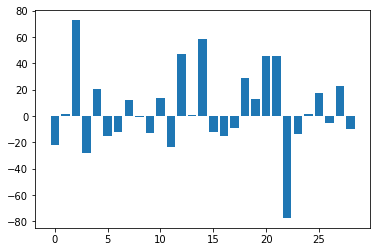

In [138]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [139]:
for i,v in enumerate(importance):
    if abs(v) > 15:
        print('Feature: %0s, Score: %.2f' % (X.columns[i],v))

Feature: year_offset, Score: -21.89
Feature: food_fruit, Score: 72.62
Feature: food_apple, Score: -28.25
Feature: food_txakoli, Score: 20.47
Feature: food_kiwi, Score: -15.26
Feature: lev_max, Score: -23.29
Feature: lev_mid, Score: 46.75
Feature: rain, Score: 58.37
Feature: rain_cum, Score: -15.30
Feature: rain_max_day, Score: 28.98
Feature: temp_avg, Score: 45.27
Feature: temp_max_abs, Score: 45.29
Feature: temp_max_avg, Score: -77.50
Feature: wind_max, Score: 17.41
Feature: population, Score: 22.81


## Train the model

### With the variables suggested by the Feature Importance method

In [140]:
model = ols('NESTS ~ year_offset + food_fruit + food_apple + food_txakoli + food_kiwi + lev_max + lev_mid + rain + rain_cum + rain_max_day + temp_avg + temp_max_abs + temp_max_avg + wind_max + population',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     4.820
Date:                Wed, 26 May 2021   Prob (F-statistic):           5.27e-08
Time:                        00:51:02   Log-Likelihood:                -1051.5
No. Observations:                 224   AIC:                             2135.
Df Residuals:                     208   BIC:                             2190.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.526e+04   1.57e+04      3.520   

### Backward elimination

In [141]:
model = ols('NESTS ~ year_offset + food_txakoli + lev_mid + temp_avg + wind_max',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     9.995
Date:                Wed, 26 May 2021   Prob (F-statistic):           1.26e-08
Time:                        00:51:02   Log-Likelihood:                -1061.8
No. Observations:                 224   AIC:                             2136.
Df Residuals:                     218   BIC:                             2156.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3.251e+04   7902.334      4.114   

### With the Cluster Categorical

In [142]:
model = ols('NESTS ~ year_offset + food_txakoli + lev_mid + temp_avg + wind_max + C(Cluster)',\
            data=QUEEN_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  NESTS   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     24.03
Date:                Wed, 26 May 2021   Prob (F-statistic):           3.82e-28
Time:                        00:51:02   Log-Likelihood:                -1006.7
No. Observations:                 224   AIC:                             2033.
Df Residuals:                     214   BIC:                             2068.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.334e+04   6261.20

## Predict 2020's nests

In [143]:
y_2020 = model.predict(QUEEN_predict)
y_2020

0     -11.178546
1      49.010401
2      -9.957574
3      -7.837270
4      42.890619
         ...    
107    -0.984726
108    -8.011847
109     2.825910
110     7.361850
111   -22.204653
Length: 112, dtype: float64

In [144]:
# Any municipality resulting in NESTS<0 is equivalent to = 0

y_2020[y_2020 < 0] = 0
y_2020

0       0.000000
1      49.010401
2       0.000000
3       0.000000
4      42.890619
         ...    
107     0.000000
108     0.000000
109     2.825910
110     7.361850
111     0.000000
Length: 112, dtype: float64

In [145]:
QUEEN_predict['NESTS'] = y_2020

In [146]:
HEX = QUEEN_predict.loc[:,['municip_code','municip_name','NESTS']].groupby(by=['municip_code','municip_name'], as_index=False).sum()

In [147]:
y_2020.sum()

990.9649611866259

## Manual adjustments

In [148]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), 'NESTS'] = 0

In [149]:
HEX.loc[HEX.municip_code.isin([48022, 48071, 48088, 48074, 48051, 48020]), :]

,municip_code,municip_name,NESTS
19,48020,Bilbao,0.0
21,48022,Karrantza Harana/Valle de Carranza,0.0
50,48051,Lanestosa,0.0
70,48071,Muskiz,0.0
73,48074,Urduña/Orduña,0.0
87,48088,Ubide,0.0


In [150]:
HEX.columns = ["CODIGO MUNICIPIO", "NOMBRE MUNICIPIO", "NIDOS 2020"] # change column names to Spanish (Competition template)

## Verify dataset format

In [151]:
check_data(HEX)

(112, 3) : Shape is correct.
112 : Number of unique municipalities is correct.
Great! All municipalities have NESTS >= 0.
The Total 2020 Nests' Prediction is 990


## Export dataset for submission

In [152]:
HEX.to_csv('WaspBusters_20210519_OLSyearsClusters.csv', index=False)